# Data Cleanup

In [164]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr
from glob import glob
from scipy.interpolate import interp1d
import os
from scipy.optimize import curve_fit
from scipy.signal import argrelextrema
import h5py
import scipy.io

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import *
from tensorflow.keras import Sequential
from tensorflow.keras.regularizers import l1_l2
import warnings
warnings.filterwarnings('ignore')

ori_path = '/Users/fayeed/Desktop/Columbia University/First Year/Machine Learning/Project' # os.getcwd()
os.getcwd()

'/Users/fayeed/Desktop/Columbia University/First Year/Machine Learning/Project'

In [188]:
batch = 1 # NOTE: run batch 2 first, then batch 1, then batch 3

if batch == 1:
    filename = ori_path + '/Paper 1/2017-05-12_batchdata_updated_struct_errorcorrect.mat'
    fileout = 'Batch1'
elif batch == 2:
    filename = ori_path + '/Paper 1/2017-06-30_batchdata_updated_struct_errorcorrect.mat'
    fileout = 'Batch2'
elif batch == 3:
    filename = ori_path + '/Paper 1/2018-04-12_batchdata_updated_struct_errorcorrect.mat'
    fileout = 'Batch3'
    
file = h5py.File(filename)


#where the loop for batches would go
# file_idx = 0# batch 1 - 0, batch 2 - 1, batch 3 - 1

batch_summary_file = file['batch']['summary'] # batch_summary_file[i,j], where j = 0, and i = 0 to 45
num_cells = batch_summary_file.shape[0]

cycle_life_file = file['batch']['cycle_life'] # summary of cycle life

cycles_file = file['batch']['cycles'] # data per cycles

summ_temp = [] #temporary list for summary arrays
cycle_id = []
cell_id = []
batch_id = []
cells_temp = []
num_cells # 3 - 46, 2 - 48, 1 - 46 (batch 1 - total cells 46)

46

## TEST OUT THE SIZE OF FIGURE SUBPLOTS (ignore)

In [349]:
# fig,ax = plt.subplots(7,7,figsize=(25,20))
# plt.subplots_adjust(left=0.05, right=0.95, bottom=0.05, top=0.95, wspace=0.3, hspace=0.5)
# fig.delaxes(ax[6,4]); fig.delaxes(ax[6,5]); fig.delaxes(ax[6,6])
# fig.suptitle('Batch 3 After 100 Interpolation and Cell %.f, %.f, and %.f Removed'%(ignore_list_3[0],ignore_list_3[1],ignore_list_3[2]),fontsize=20)

# # ax.set_visible(False)
# fig.supxlabel('Voltage (V)',fontsize=20)
# fig.supylabel('Discharge capacity (Ah)',fontsize=20)
# # fig.tight_layout(pad=1.0, w_pad=0.1, h_pad=0.1)
# ax[6,6].plot([1,2,3],[4,5,6])

# # i = 1
# # for j in range(10):
# #     if i >= 2:
# #         break
# #     else:
# #         i = i + 1

# #     print(j,i)
# # print('hello')

### Plot the raw discharge curves 

Done with cell 0
cycle 0, cell 0
cycle 1, cell 0
cycle 2, cell 0
cycle 3, cell 0
cycle 4, cell 0
cycle 5, cell 0
cycle 6, cell 0
cycle 7, cell 0
cycle 8, cell 0
cycle 9, cell 0
cycle 10, cell 0
cycle 11, cell 0
cycle 12, cell 0
cycle 13, cell 0
cycle 14, cell 0
cycle 15, cell 0
cycle 16, cell 0
cycle 17, cell 0
cycle 18, cell 0
cycle 19, cell 0
cycle 20, cell 0
cycle 21, cell 0
cycle 22, cell 0
cycle 23, cell 0
cycle 24, cell 0
cycle 25, cell 0
cycle 26, cell 0
cycle 27, cell 0
cycle 28, cell 0
cycle 29, cell 0
cycle 30, cell 0
cycle 31, cell 0
cycle 32, cell 0
cycle 33, cell 0
cycle 34, cell 0
cycle 35, cell 0
cycle 36, cell 0
cycle 37, cell 0
cycle 38, cell 0
cycle 39, cell 0
cycle 40, cell 0
cycle 41, cell 0
cycle 42, cell 0
cycle 43, cell 0
cycle 44, cell 0
cycle 45, cell 0
cycle 46, cell 0
cycle 47, cell 0
cycle 48, cell 0
cycle 49, cell 0
cycle 50, cell 0
cycle 51, cell 0
cycle 52, cell 0
cycle 53, cell 0
cycle 54, cell 0
cycle 55, cell 0
cycle 56, cell 0
cycle 57, cell 0
cycle 5

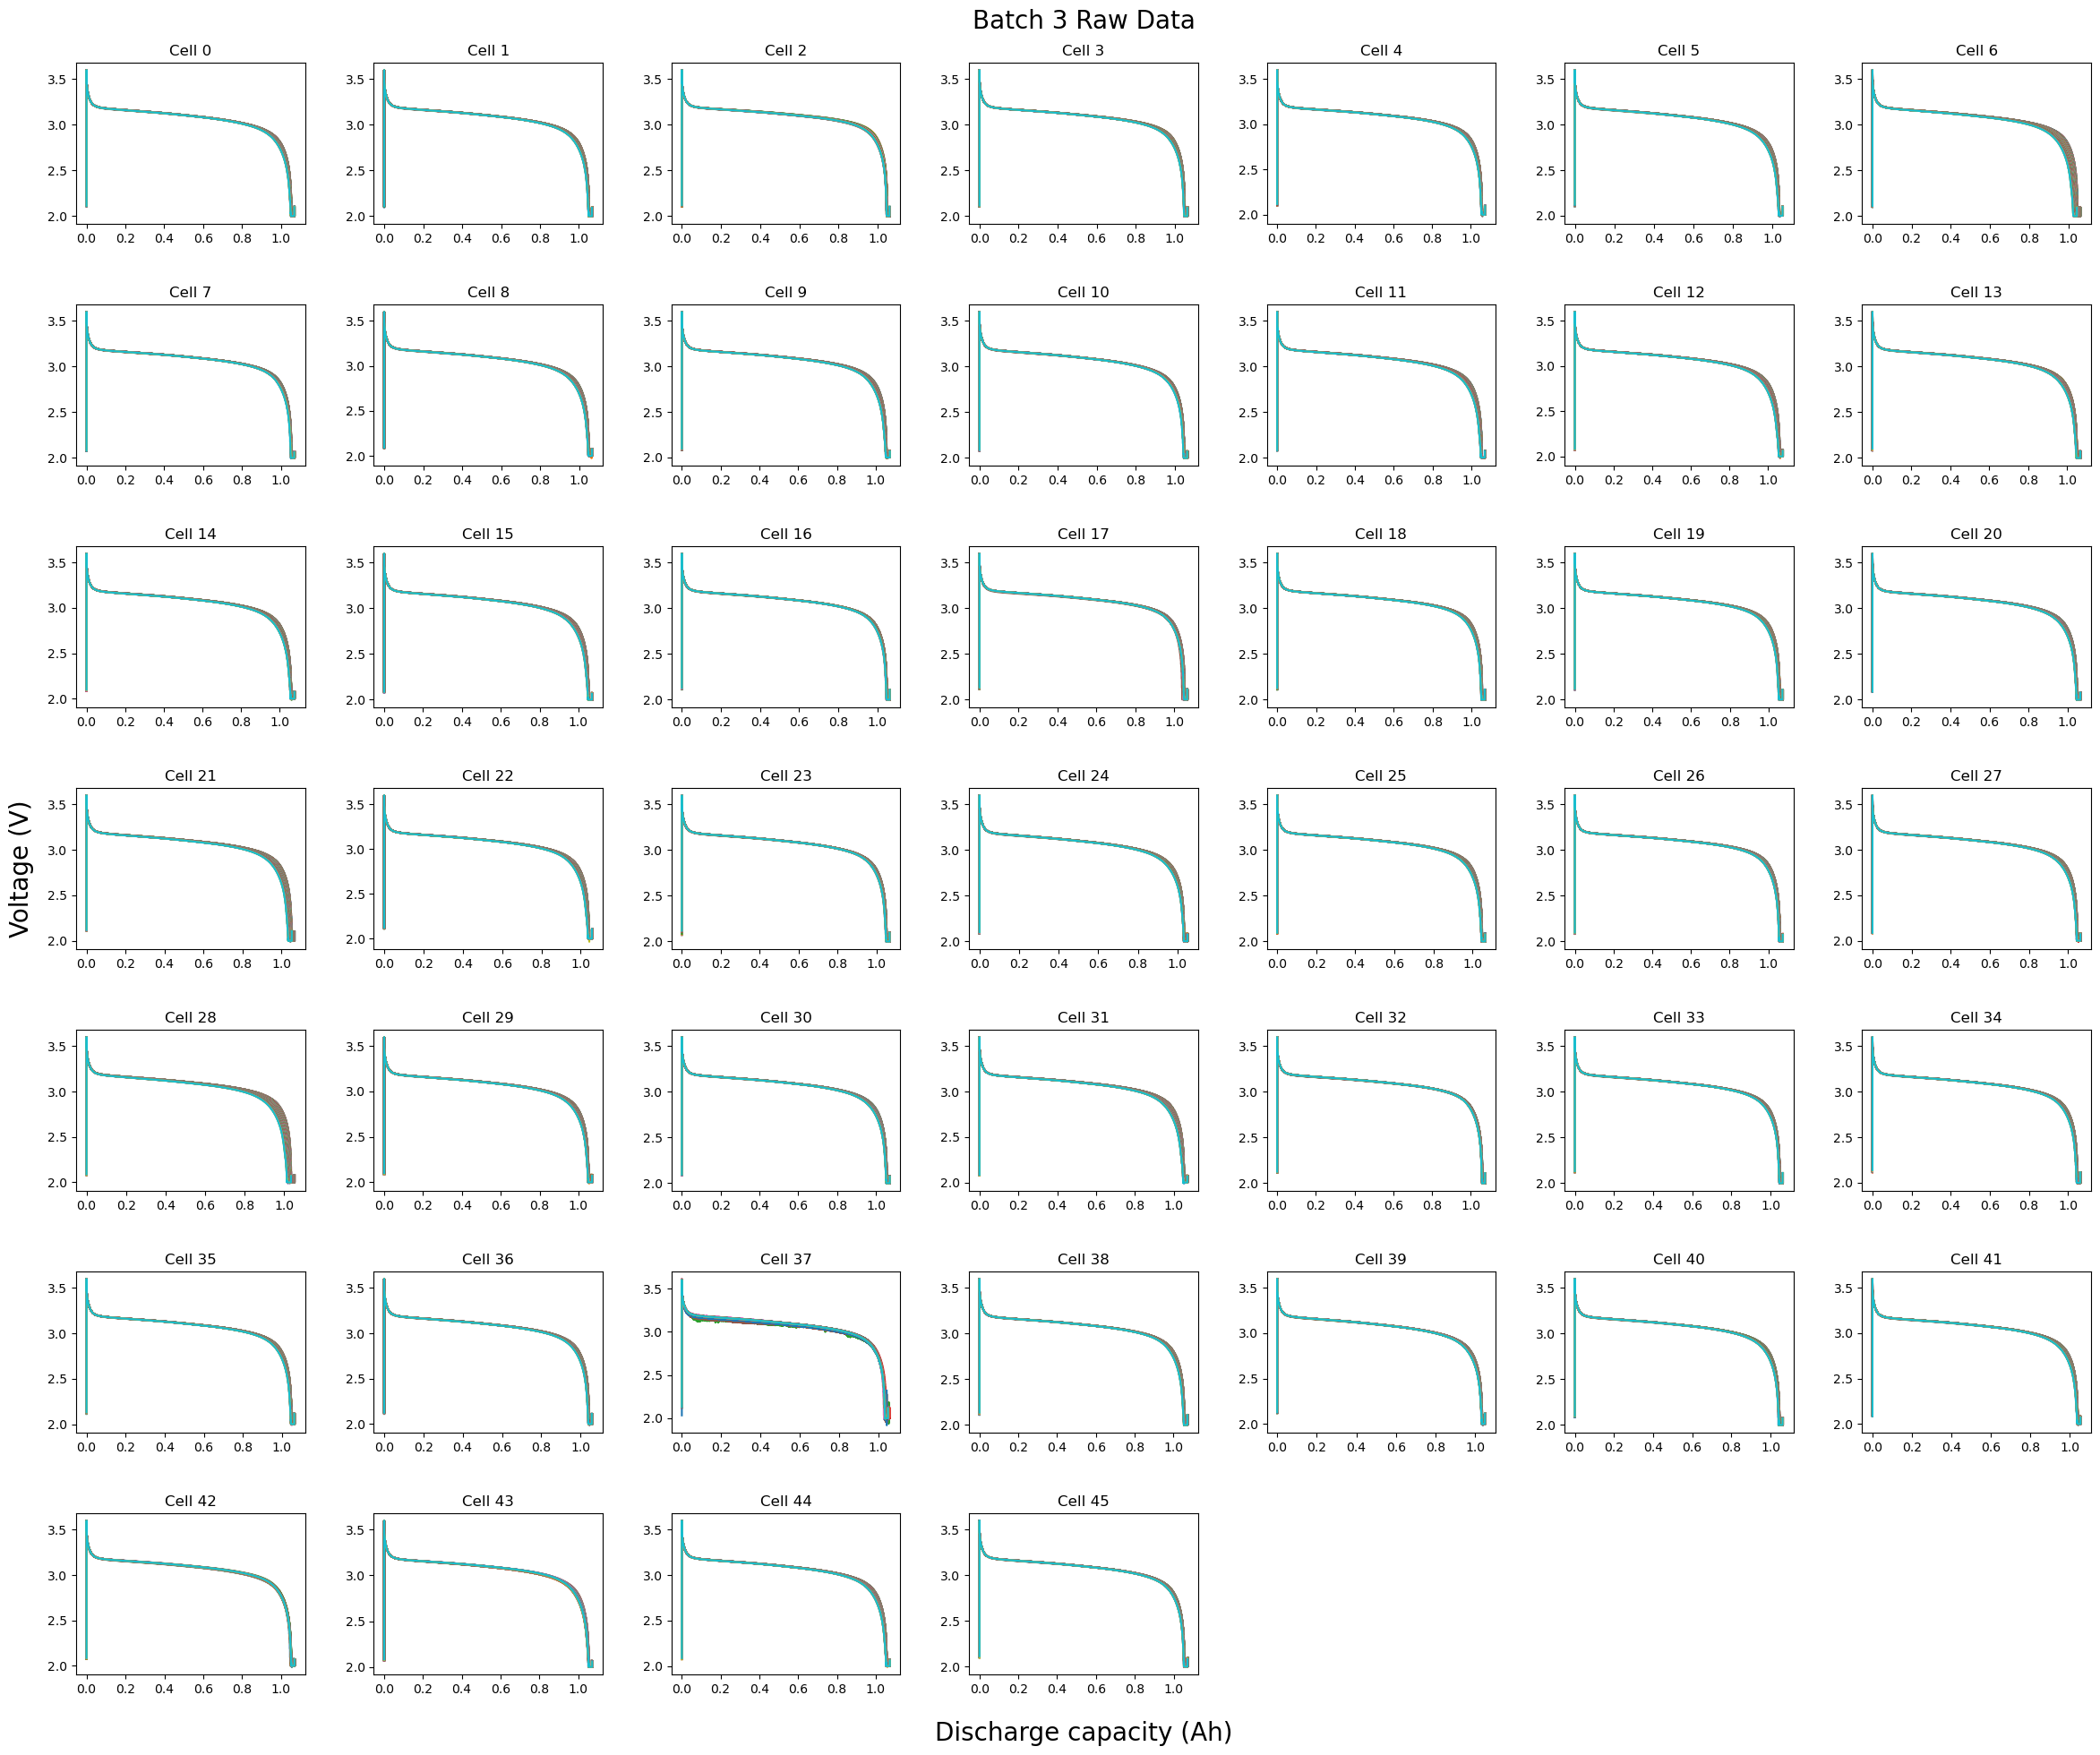

In [362]:
# summ_temp = [] #temporary list for summary arrays
# fig,ax = plt.subplots(7,7,figsize=(25,20)) # for batch 3, 2, 1
# fig.delaxes(ax[6,4]); fig.delaxes(ax[6,5]); fig.delaxes(ax[6,6]) # for batch 3,1
# # fig.delaxes(ax[6,6]); # for batch 2

# plt.subplots_adjust(left=0.05, right=0.95, bottom=0.05, top=0.95, wspace=0.3, hspace=0.5)
# fig.suptitle('Batch 3 Raw Data',fontsize=20)
# # fig.suptitle('Batch 2 Raw Data',fontsize=20)
# # fig.suptitle('Batch 1 Raw Data',fontsize=20)

# fig.supylabel('Voltage (V)',fontsize=20)
# fig.supxlabel('Discharge capacity (Ah)',fontsize=20)
# i = 0
# for row in range(7):
#     for col in range(7):
        
#         # for i in range(num_cells):#[0,1,2,3,4]:#7,8,9,15,16]:#[8,10,12,13,22]:#range(num_cells):#[18]:#[0,1,2,3,4]:#range(num_cells):

#         cycle_life = file[cycle_life_file[i,0]][0]

#         # internalR_data = file[batch_summary_file[i,0]]['IR'][0,:].tolist()
#         # charge_data = file[batch_summary_file[i,0]]['QCharge'][0,:].tolist()
#         discharge_data = file[batch_summary_file[i,0]]['QDischarge'][0,:].tolist()
#         # tavg_data = file[batch_summary_file[i,0]]['Tavg'][0,:].tolist()
#         # tmin_data = file[batch_summary_file[i,0]]['Tmin'][0,:].tolist()
#         # tmax_data = file[batch_summary_file[i,0]]['Tmax'][0,:].tolist()
#         # chargetime_data = file[batch_summary_file[i,0]]['chargetime'][0,:].tolist()
#         cycleNum_data = file[batch_summary_file[i,0]]['cycle'][0,:].tolist()
#         # array_empty[i]= len(cycleNum_data)
#         # print(len(cycleNum_data))


#         ################ SUMMARY DATA FOR EACH CELL INTO A FORMATTED FILE FOR ML #############    
#         # summary_IR = np.hstack(internalR_data)
#         # shape = [len(summary_IR),1]
#         # summary_IR.reshape(shape)
#         # summary_charge = np.hstack(charge_data)
#         summary_discharge = np.hstack(discharge_data)
#         # summary_tavg = np.hstack(tavg_data)
#         # summary_tmin = np.hstack(tmin_data)
#         # summary_tmax = np.hstack(tmax_data)
#         # summary_chargetime = np.hstack(chargetime_data)
#         summary_cycleNum = np.hstack(cycleNum_data)

#         # cell_num = np.ones(shape=len(summary_IR))*i
            

#         ds = xr.Dataset({'Discharge': ('cycleNum', summary_discharge)},
#                         coords={'cycleNum': summary_cycleNum,})
#         ds.expand_dims(dim={'cell_id': i})
#         summ_temp.append(ds)

#         print('Done with cell ' + str(i))
#         # print(summary_cycleNum.shape)

#         ################ DATA PER CYCLE FOR EACH CELL INTO A FORMATTED FILE FOR ML #############
#         cycles = file[cycles_file[i,0]]
#         #num_of_cycles = cycles['I'].shape[0]

#         if file_idx == 0:
#             num_of_cycles = 101
#         else:
#             num_of_cycles = 100

        
        
#         #100 # do 101 for only batch 1, cuz they dont have first cycle data, and need to run from j = 1 to 101, not 0 to 100

#         cycle_temp = [] #temporary list for cycle arrays

#         for j in range(num_of_cycles):
#         # for j in range(1, num_of_cycles): # only for batch 1
#             # if j not in [30,31,32,33,34,35,36,37]: # just for batch1, cell18, cycle 30, weird jump in voltage
#             if file_idx == 0 and j == 0:
#             # if file_idx == 0: # no data for first cycle in file 1
#                 # print('nothing')
#                 continue
            
#             print('cycle %.f, cell %.f'%(j, i))
#             voltage = np.array((file[cycles['V'][j,0]])).squeeze()
#             discharge_cap = np.array((file[cycles['Qd'][j,0]])).squeeze()
#             charge_cap = np.array((file[cycles['Qc'][j,0]])).squeeze()
#             current = np.array((file[cycles['I'][j,0]])).squeeze()
#             time = np.array((file[cycles['t'][j,0]])).squeeze()
#             temp = np.array((file[cycles['T'][j,0]])).squeeze()
#             ax[row,col].plot(discharge_cap,voltage)#,'k-o')
#             ax[row,col].set_title('Cell %.f'%(i))
#             # plt.plot(discharge_cap,voltage)#,'k-o')
#             # plt.xlabel('Discharge Capacity (Ah)')
#             # plt.ylabel('Voltage (V)')
#             ################### remove the datapoints where the battery is charging ###################
#             ################### so when it reached the max volt = 3.6, it will start discharging ###################
#             ################### so I used the max 3.6 as the cut-off point for all data, and keep the rest after that max data point ###################
        
#             disWindow = np.logical_and(discharge_cap <= 0.2*np.max(discharge_cap), discharge_cap >= 0)
#             voltage_temp = voltage[disWindow]#cut_off_idx_min]
#             discharge_cap_temp = discharge_cap[disWindow]#cut_off_idx_min]
#             # print(disWindow)
#             # plt.plot(discharge_cap_temp,voltage_temp,'k-o')

#             cut_off_idx = np.argmax(voltage_temp)
#             # print(cut_off_idx)
#             voltage = voltage[cut_off_idx:]#cut_off_idx_min]
#             discharge_cap = discharge_cap[cut_off_idx:]#cut_off_idx_min]
#             # plt.plot(discharge_cap,voltage,'r-o')

#             cut_off_idx = np.argmin(voltage)
#             # print(cut_off_idx)
#             voltage = voltage[0:cut_off_idx]#cut_off_idx_min]
#             discharge_cap = discharge_cap[0:cut_off_idx]

#             # plt.plot(discharge_cap,voltage,'k-o')

#             # disWindow = np.logical_and(discharge_cap <= np.max(discharge_cap), discharge_cap >= 0.8*np.max(discharge_cap))
#             # voltage_temp = voltage[disWindow]#cut_off_idx_min]
#             # discharge_cap_temp = discharge_cap[disWindow]#cut_off_idx_min]
#             # cut_off_idx = np.argmin(voltage_temp)
#             # voltage = voltage[:cut_off_idx+len(voltage)]#cut_off_idx_min]
#             # discharge_cap = discharge_cap[:cut_off_idx+len(voltage)]#cut_off_idx_min]
#             # plt.plot(discharge_cap_temp,voltage_temp,'k-o')
#             # plt.plot(discharge_cap,voltage,'r-o')


#             # plt.plot(discharge_cap,voltage,'r-o')


#             # cut_off_idx = np.argmax(voltage) # where it starts to be discharged, initially being charged
#             # cut_off_idx_min = np.argmin(2.0) # weird tail at the end of the discharge curve
#             # print(cut_off_idx)#_min)
#             # voltage = voltage[cut_off_idx:]#cut_off_idx_min]

#             # discharge_cap = discharge_cap[cut_off_idx:]#cut_off_idx_min]

#             # cut_off_idx_min = np.argmin(voltage)
#             # print(cut_off_idx,cut_off_idx_min)
#             # plt.plot(discharge_cap,voltage,'k-o')
#             # plt.plot(time,voltage,'ko-')
#             # plt.xlim([0,100])
#             # print(time)

#             # voltage = voltage[cut_off_idx:]#cut_off_idx_min]
#             # discharge_cap = discharge_cap[cut_off_idx:]#cut_off_idx_min]
#             # plt.plot(discharge_cap,voltage,'r-o')

#             # charge_cap = charge_cap[cut_off_idx:cut_off_idx_min]
#             # current = current[cut_off_idx:cut_off_idx_min]
#             # time = time[cut_off_idx:cut_off_idx_min]
#             # temp = temp[cut_off_idx:cut_off_idx_min]
            

#             # get sections of data for charge/discharge that is within the actual voltage window          
#             # vWindow = np.logical_and(voltage <= 3.5, voltage >= 2.0)
#             # voltage = voltage[vWindow]
#             # # current = current[vWindow]
#             # # time = time[vWindow]
#             # # temp = temp[vWindow]
#             # # charge_cap = charge_cap[vWindow]
#             # discharge_cap = discharge_cap[vWindow]
            
#             ################### linear interpolation of the curve, so that I can have 100 data points for all cycles ###################
#             # if len(voltage) == 0:
#             #     ds2 = xr.Dataset({'Qd': ('voltage', np.nan)},
#             #                 coords={'voltage': np.nan,})      
#             #     ds2.expand_dims(dim={'cycle_id': j})

#             func_interp = interp1d(voltage,discharge_cap,fill_value = "extrapolate") 
#             # min and max voltage not necessarily at 2 and 3.5, so add extrapolate so no error message for the next lines
#             volt_interp = np.linspace(2.0,3.5,100) # x-data

#             discharge_cap_interp = func_interp(volt_interp) # y-data
            
#             # plt.plot(discharge_cap_interp,volt_interp,'ro')#,label='volt'); plt.axhline(y = 3.5)       
#             # plt.plot(discharge_cap,voltage)#,'k-')

#             ds2 = xr.Dataset({'Qd': ('voltage', discharge_cap_interp)},
#                             coords={'voltage': volt_interp,})      
#             ds2.expand_dims(dim={'cycle_id': j})
#             # ds2.expand_dims(dim={'cycle_id': j - 1}) # only for batch 1, to fix the no cycle 1 data issue

#             cycle_temp.append(ds2)
#         i = i + 1   
#         if i >= num_cells:
#             break           
                
# #     combined_cycles = xr.concat(cycle_temp, dim='cycle_id')
# #     combined_cycles.expand_dims(dim={'cell_id': i})
# #     cells_temp.append(combined_cycles)

# # combined_cells = xr.concat(cells_temp, dim='cell_id')
# # combined_summ = xr.concat(summ_temp, dim='cell_id')

# # ############## make a file here for the summary data and the cycle data ##############
# # combined_cells.to_netcdf(path = fileout + '_cycle_data.nc', mode='w')
# # combined_summ.to_netcdf(path= fileout + '_summary_data.nc', mode='w')

In [24]:
fileout = 'Batch1'

if fileout == 'Batch2':
    print('yes')

# Filter out SUMMARY data (ignore)

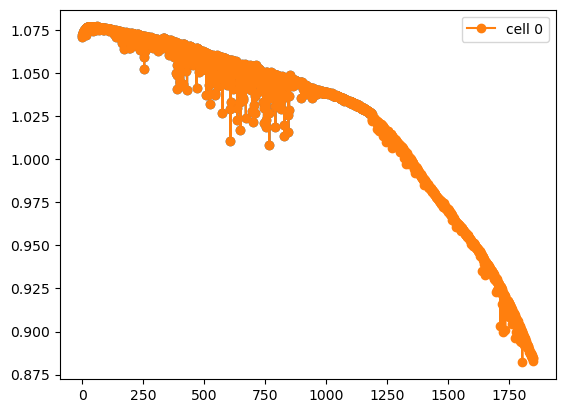

In [264]:
# def custom_function(n, m0, mf, Nk, y_int,delt):
#     return m0 * n + (mf - m0) * delt * np.log((np.exp(n/delt) + np.exp(Nk/delt)) / (1 + np.exp(Nk/delt))) + y_int

# def remove_outliers_flexible(x, y, func=custom_function, sigma_std = 2):

#     params, _ = curve_fit(func, x, y, p0=[-0.5e-4,-0.001,600,1.1,50], maxfev=5000) # p0 is initial guess
#     # params, _ = curve_fit(func, x, y, bounds = (lower_bound,upper_bound), maxfev=5000) # p0 is initial guess

#     # # Calculate predicted values
#     predicted_y = func(x, *params)

#     # Calculate residuals
#     residuals = y - predicted_y
#     residual_std = np.std(residuals)
#     threshold = sigma_std*residual_std
#     # Identify outliers
#     outliers = np.abs(residuals) > threshold

#     # Remove outliers
#     cleaned_x = x[~outliers]
#     cleaned_y = y[~outliers]

#     return cleaned_x, cleaned_y, params,residuals
    

# for i in [0]:#range(num_cells):
#     cycle_life = file[cycle_life_file[i,0]][0]

#     discharge_data = file[batch_summary_file[i,0]]['QDischarge'][0,:].tolist()
    
#     cycleNum_data = file[batch_summary_file[i,0]]['cycle'][0,:].tolist()

#     summary_discharge = np.hstack(discharge_data)

#     summary_cycleNum = np.hstack(cycleNum_data)

#     if fileout == 'Batch1':
#         if ((i == 20 or i == 21)):
#             summary_discharge = np.delete(summary_discharge,[0,12],None)
#             summary_cycleNum = np.delete(summary_cycleNum,[0,12],None)
#         elif (i == 36):
#             summary_discharge = np.delete(summary_discharge,[0,72],None)
#             summary_cycleNum = np.delete(summary_cycleNum,[0,72],None)
#         elif ((i == 0 or i == 3 or i == 4)):
#             summary_discharge = np.delete(summary_discharge,[0,11],None)
#             summary_cycleNum = np.delete(summary_cycleNum,[0,11],None)
#         elif (i == 18):
#             summary_discharge = np.delete(summary_discharge,[0,48,49,50,51,52],None)
#             summary_cycleNum = np.delete(summary_cycleNum,[0,48,49,50,51,52],None)
#         else:
#             summary_discharge = summary_discharge[1:] # remove cycle 0 data
#             summary_cycleNum = summary_cycleNum[1:] # remove cycle 0 data

#         if i in move_list_1:
#             summary_cycleNum = np.arange(0,summary_cycleNum.shape[0])
#             # print(len(summary_cycleNum))

#             plt.plot(summary_cycleNum,summary_discharge,'-o')
#             summary_discharge = np.concatenate([summary_discharge,summary_discharge_temp[move_list_2[i],:]],axis = None)
#             summary_cycleNum = np.concatenate([summary_cycleNum,summary_cycleNum_temp[move_list_2[i],:]],axis = None)
#             summary_cycleNum = np.arange(0,summary_cycleNum.shape[0])
#             # print(len(summary_cycleNum))
#             # plt.plot(summary_cycleNum,summary_discharge,'-o')

#             # print(i,summary_discharge_temp[move_list_2[i],:])     
#     elif fileout == 'Batch2':
#         if i == 1: # remove the cell entirely
#             continue
#         elif i in (7,8,9,15,16):
#             print(i,len(summary_discharge),len(summary_cycleNum))
#             summary_discharge_temp[i,:len(summary_discharge)] = summary_discharge
#             summary_cycleNum_temp[i,:len(summary_cycleNum)] = summary_cycleNum
#             continue
            
#     elif fileout == 'Batch3': # remove the cell entirely
#         if i == 37:
#             continue
    
#     summary_cycleNum = np.arange(0,summary_cycleNum.shape[0])
    
#     ds = xr.Dataset({'Discharge': ('cycleNum', summary_discharge)},
#                     coords={'cycleNum': summary_cycleNum,})
#     ds.expand_dims(dim={'cell_id': i})
#     summ_temp.append(ds)

#     plt.plot(summary_cycleNum,summary_discharge,'-o',label = 'cell %.f'%(i))
#     plt.legend()
#     ################ DATA PER CYCLE FOR EACH CELL INTO A FORMATTED FILE FOR ML #############
#     cycles = file[cycles_file[i,0]]
    
#     cycle_temp = [] #temporary list for cycle arrays
#     if fileout == 'Batch1':
#         if i in [0,3,4,20,21,36]: # only for batch 1
#             num_of_cycles = 102
#         elif i == 18:
#             num_of_cycles = 106
#         else:
#             num_of_cycles = 101
#     else:
#         num_of_cycles = 100


#     for j in range(num_of_cycles):
 
#         if fileout == 'Batch1' and j == 0:
#             continue
        
#         # print('Cycle %.f, cell %.f'%(j, i))
#         voltage = np.array((file[cycles['V'][j,0]])).squeeze()
#         discharge_cap = np.array((file[cycles['Qd'][j,0]])).squeeze()
       
#         ################### remove the datapoints where the battery is charging ###################
#         ################### so when it reached the max volt = 3.6, it will start discharging ###################
#         ################### so I used the max 3.6 as the cut-off point for all data, and keep the rest after that max data point ###################
    
#         disWindow = np.logical_and(discharge_cap <= 0.2*np.max(discharge_cap), discharge_cap >= 0) # to extract the location of max voltage = 3.6 V
#         voltage_temp = voltage[disWindow]#cut_off_idx_min]
#         discharge_cap_temp = discharge_cap[disWindow]#cut_off_idx_min]
       
#         cut_off_idx = np.argmax(voltage_temp) # to get the 3.6 V
#         # print(cut_off_idx)
#         voltage = voltage[cut_off_idx:]#cut_off_idx_min] # to get the data after 3.6 V
#         discharge_cap = discharge_cap[cut_off_idx:]#cut_off_idx_min]
#         # plt.plot(discharge_cap,voltage,'r-o')

#         cut_off_idx = np.argmin(voltage) # to get the minimum 2.0 V
#         # print(cut_off_idx)
#         voltage = voltage[0:cut_off_idx]#cut_off_idx_min] # to get the data before 2.0 V and keep data after 3.6V
#         discharge_cap = discharge_cap[0:cut_off_idx]

#         if fileout == 'Batch1':
#             if i == 11 and j == 11: # cell 11, cycle 11, weird spike at the end
#                 loop =  True; idx = 0
#                 disWindow = np.logical_and(discharge_cap <= 1.1, discharge_cap >= 0.8) # to extract the location of max voltage = 3.6 V
#                 voltage_temp = voltage[disWindow]#cut_off_idx_min]
#                 discharge_cap_temp = discharge_cap[disWindow]#cut_off_idx_min]
                
#                 while loop == True:
#                     diff = voltage_temp[idx + 1] - voltage_temp[idx] # to remove the spikes at the end
#                     if diff > 0: # where the spikes begin
#                         idx_keep = idx + (len(voltage) - len(voltage_temp)) 
#                         loop = False
#                     idx = idx + 1
#                 voltage = voltage[0:idx_keep]#cut_off_idx_min] # to get the data before 2.0 V and keep data after 3.6V
#                 discharge_cap = discharge_cap[0:idx_keep]
            
        
#         ################### linear interpolation of the curve, so that I can have 100 data points for all cycles ###################
#         func_interp = interp1d(voltage,discharge_cap,kind = 'nearest',fill_value = "extrapolate") # default is linear, and interpolate, nearest is rounding down, nearest-up is rounding up
#         # min and max voltage not necessarily at 2 and 3.5, so add extrapolate so no error message for the next lines
#         volt_interp = np.linspace(2.0,3.5,100) # x-data
#         # volt_interp = np.linspace(np.min(voltage),np.max(voltage),100) # x-data
#         # print(np.min(voltage),np.max(voltage))

#         discharge_cap_interp = func_interp(volt_interp) # y-data
        
        
#         if fileout == 'Batch1':
#             if ((i == 20 or i == 21) and j == 12) or (i == 36 and j == 72) or ((i == 0 or i == 3 or i == 4) and j == 11) or (i == 18 and (j == 48 or j == 49 or j == 50 or j == 51 or j == 52)):
#                 # print(i,j,'im here')
#                 continue

#         ds2 = xr.Dataset({'Qd': ('voltage', discharge_cap_interp)},
#                         coords={'voltage': volt_interp,})      
#         ds2.expand_dims(dim={'cycle_id': j})

#         cycle_temp.append(ds2)
    
                
#     combined_cycles = xr.concat(cycle_temp, dim='cycle_id')
#     combined_cycles.expand_dims(dim={'cell_id': i})
#     # print(type(combined_cycles))
#     cells_temp.append(combined_cycles)
#     # print(((i,j,combined_cycles.dims)))
#     # print('cell %.f cycle %.f shape %.f %.f'%(i,j,combined_cycles.dims[0],combined_cycles.dims[1]))
# # combined_cells = xr.concat(cells_temp, dim='cell_id')
# # combined_summ = xr.concat(summ_temp, dim='cell_id')

# # ############## make a file here for the summary data and the cycle data ##############
# # combined_cells.to_netcdf(path = fileout + '_cycleData.nc', mode='w')
# # combined_summ.to_netcdf(path= fileout + '_summaryData.nc', mode='w')

# Filter out the data, then replot

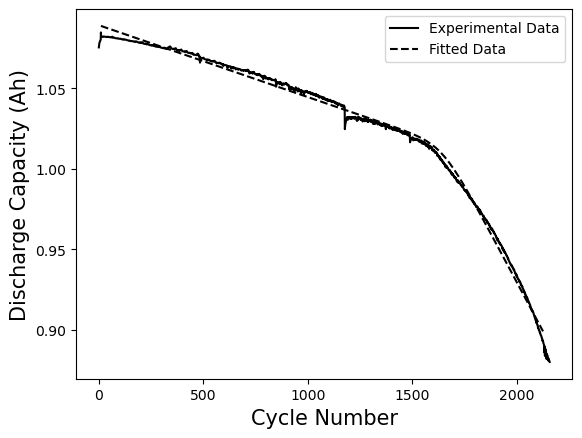

In [193]:
def custom_function(n, m0, mf, Nk, y_int):
    delt = 50
    return m0 * n + (mf - m0) * delt * np.log((np.exp(n/delt) + np.exp(Nk/delt)) / (1 + np.exp(Nk/delt))) + y_int

def remove_outliers_flexible(x, y, func=custom_function, sigma_std = 2):
    # x = x[~np.isnan(x)]
    x = x[~np.isnan(y)]
    y = y[~np.isnan(y)]
    lower_bound = [-1e-3,-2e-2,0,1.05]
    upper_bound = [0,0,3000,1.1]
    # params, _ = curve_fit(func, x, y, p0=[-0.5e-4,-0.001,600,1.1,50], maxfev=50000) # p0 is initial guess
    params, _ = curve_fit(func, x, y, bounds = (lower_bound,upper_bound), maxfev=50000) # p0 is initial guess

    # # Calculate predicted values
    predicted_y = func(x, *params)

    # Calculate residuals
    residuals = y - predicted_y
    residual_std = np.std(residuals)
    threshold = sigma_std*residual_std
    # Identify outliers
    outliers = np.abs(residuals) > threshold

    # Remove outliers
    cleaned_x = x[~outliers]
    cleaned_y = y[~outliers]

    y_calc = func(cleaned_x, *params)
    RSSY = np.sum((cleaned_y - y_calc)**2)

    return cleaned_x, cleaned_y, params, RSSY
    
ignore_list_3 = [37] # 23,32 didnt reached 80% max cap
move_list_2 = [7,8,9,15,16] # add to batch 1 data (but can be removed since we only want the first 100 cycles)
ignore_list_2 = [1,7,8,9,15,16]
move_list_1 = [0,1,2,3,4]
# ignore_list_1 = [8,10,12,13,18,22] # from visualization, cell 18 should be removed too # keep cell 0,1,2,3,4 for first batch
ignore_list_1 = []#8,10,12,13,18,22] # from visualization, cell 18 should be removed too # keep cell 0,1,2,3,4 for first batch
# remove_cycle_1 = [0,1,2,3,4,8,10,12,13,18,20,21,22,36]
remove_cycle_1 = [0,3,4,18,20,21,36]
keep_cycle_1 = [1,2,8,10,12,13,22] # 8,10,12,13,22 - didnt reached 80% max cap, 1,2 - continued into batch 2
summ_temp = [] #temporary list for summary arrays
cycle_id = []
cell_id = []
batch_id = []
cells_temp = []
params_total = []
resi_total = []
# ds_new = []

cells_temp_new = []

summ_temp_new = []

cycle_life_df = pd.DataFrame(columns = ['cell_id','cycle_life'])

################### only for batch 2 -  to be combined with batch 1 data ###################
if fileout == 'Batch2':
    # 17 cuz 16 is the last cell # i need to filter, 1060 cuz that's the longest cycle number out of all the data i need to specially filter
    summary_discharge_temp = np.zeros((17,1060)); 
    summary_cycleNum_temp = np.zeros((17,1060));
    summary_IR_temp = np.zeros((17,1060));
    summary_tavg_temp = np.zeros((17,1060));
    summary_tmin_temp = np.zeros((17,1060));
    summary_tmax_temp = np.zeros((17,1060));
    summary_charge_temp = np.zeros((17,1060));
    summary_chargetime_temp = np.zeros((17,1060));

    summary_discharge_temp.fill(np.nan)
    summary_cycleNum_temp.fill(np.nan)
    summary_IR_temp.fill(np.nan)
    summary_tavg_temp.fill(np.nan)
    summary_tmin_temp.fill(np.nan)
    summary_tmax_temp.fill(np.nan)
    summary_charge_temp.fill(np.nan)
    summary_chargetime_temp.fill(np.nan)
################### end of - only for batch 2 -  to be combined with batch 1 data ###################

for i in [1]:#range(num_cells):#[0,1,2,3,4]:#7,8,9,15,16]:#[8,10,12,13,22]:#range(num_cells):#[18]:#[0,1,2,3,4]:#range(num_cells):

    cycle_life = file[cycle_life_file[i,0]][0]

    discharge_data = file[batch_summary_file[i,0]]['QDischarge'][0,:].tolist()
    cycleNum_data = file[batch_summary_file[i,0]]['cycle'][0,:].tolist()
    internalR_data = file[batch_summary_file[i,0]]['IR'][0,:].tolist()
    tavg_data = file[batch_summary_file[i,0]]['Tavg'][0,:].tolist()
    tmin_data = file[batch_summary_file[i,0]]['Tmin'][0,:].tolist()
    tmax_data = file[batch_summary_file[i,0]]['Tmax'][0,:].tolist()
    charge_data = file[batch_summary_file[i,0]]['QCharge'][0,:].tolist()
    chargetime_data = file[batch_summary_file[i,0]]['chargetime'][0,:].tolist()

    ################ SUMMARY DATA FOR EACH CELL INTO A FORMATTED FILE FOR ML #############    

    summary_discharge = np.hstack(discharge_data)
    summary_cycleNum = np.hstack(cycleNum_data)
    summary_IR = np.hstack(internalR_data)
    summary_tavg = np.hstack(tavg_data)
    summary_tmin = np.hstack(tmin_data)
    summary_tmax = np.hstack(tmax_data)
    summary_charge = np.hstack(charge_data)
    summary_chargetime = np.hstack(chargetime_data)

    if fileout == 'Batch1':
        if ((i == 20 or i == 21)):
            summary_discharge = np.delete(summary_discharge,[0,12],None)
            summary_cycleNum = np.delete(summary_cycleNum,[0,12],None)
            summary_IR = np.delete(summary_IR,[0,12],None)
            summary_tavg = np.delete(summary_tavg,[0,12],None)
            summary_tmin = np.delete(summary_tmin,[0,12],None)
            summary_tmax = np.delete(summary_tmax,[0,12],None)
            summary_charge = np.delete(summary_charge,[0,12],None)
            summary_chargetime = np.delete(summary_chargetime,[0,12],None)
        elif (i == 36):
            summary_discharge = np.delete(summary_discharge,[0,72],None)
            summary_cycleNum = np.delete(summary_cycleNum,[0,72],None)
            summary_IR = np.delete(summary_IR,[0,72],None)
            summary_tavg = np.delete(summary_tavg,[0,72],None)
            summary_tmin = np.delete(summary_tmin,[0,72],None)
            summary_tmax = np.delete(summary_tmax,[0,72],None)
            summary_charge = np.delete(summary_charge,[0,72],None)
            summary_chargetime = np.delete(summary_chargetime,[0,72],None)
        elif ((i == 0 or i == 3 or i == 4)):
            summary_discharge = np.delete(summary_discharge,[0,11],None)
            summary_cycleNum = np.delete(summary_cycleNum,[0,11],None)
            summary_IR = np.delete(summary_IR,[0,11],None)
            summary_tavg = np.delete(summary_tavg,[0,11],None)
            summary_tmin = np.delete(summary_tmin,[0,11],None)
            summary_tmax = np.delete(summary_tmax,[0,11],None)
            summary_charge = np.delete(summary_charge,[0,11],None)
            summary_chargetime = np.delete(summary_chargetime,[0,11],None)
        elif (i == 18):
            summary_discharge = np.delete(summary_discharge,[0,48,49,50,51,52],None)
            summary_cycleNum = np.delete(summary_cycleNum,[0,48,49,50,51,52],None)
            summary_IR = np.delete(summary_IR,[0,48,49,50,51,52],None)
            summary_tavg = np.delete(summary_tavg,[0,48,49,50,51,52],None)
            summary_tmin = np.delete(summary_tmin,[0,48,49,50,51,52],None)
            summary_tmax = np.delete(summary_tmax,[0,48,49,50,51,52],None)
            summary_charge = np.delete(summary_charge,[0,48,49,50,51,52],None)
            summary_chargetime = np.delete(summary_chargetime,[0,48,49,50,51,52],None)
        else:
            summary_discharge = summary_discharge[1:] # remove cycle 0 data
            summary_cycleNum = summary_cycleNum[1:] # remove cycle 0 data
            summary_IR = summary_IR[1:] # remove cycle 0 data
            summary_tavg = summary_tavg[1:] # remove cycle 0 data
            summary_tmin = summary_tmin[1:] # remove cycle 0 data
            summary_tmax = summary_tmax[1:] # remove cycle 0 data
            summary_charge = summary_charge[1:] # remove cycle 0 data
            summary_chargetime = summary_chargetime[1:] # remove cycle 0 data

        if i in move_list_1:
            summary_cycleNum = np.arange(0,summary_cycleNum.shape[0])
            summary_discharge = np.concatenate([summary_discharge,summary_discharge_temp[move_list_2[i],:]],axis = None)
            summary_cycleNum = np.concatenate([summary_cycleNum,summary_cycleNum_temp[move_list_2[i],:]],axis = None)
            summary_cycleNum = np.arange(0,summary_cycleNum.shape[0])
            summary_IR = np.concatenate([summary_IR,summary_IR_temp[move_list_2[i],:]],axis = None)
            summary_tavg = np.concatenate([summary_tavg,summary_tavg_temp[move_list_2[i],:]],axis = None)
            summary_tmin = np.concatenate([summary_tmin,summary_tmin_temp[move_list_2[i],:]],axis = None)
            summary_tmax = np.concatenate([summary_tmax,summary_tmax_temp[move_list_2[i],:]],axis = None)
            summary_charge = np.concatenate([summary_charge,summary_charge_temp[move_list_2[i],:]],axis = None)
            summary_chargetime = np.concatenate([summary_chargetime,summary_chargetime_temp[move_list_2[i],:]],axis = None)


    elif fileout == 'Batch2':
        if i == 1: # remove the cell entirely
            continue
        elif i in (7,8,9,15,16):
            # print(i,len(summary_discharge),len(summary_cycleNum))
            summary_discharge_temp[i,:len(summary_discharge)] = summary_discharge
            summary_cycleNum_temp[i,:len(summary_cycleNum)] = summary_cycleNum
            summary_IR_temp[i,:len(summary_IR)] = summary_IR
            summary_tavg_temp[i,:len(summary_tavg)] = summary_tavg
            summary_tmin_temp[i,:len(summary_tmin)] = summary_tmin
            summary_tmax_temp[i,:len(summary_tmax)] = summary_tmax
            summary_charge_temp[i,:len(summary_charge)] = summary_charge
            summary_chargetime_temp[i,:len(summary_chargetime)] = summary_chargetime
            continue
            
    elif fileout == 'Batch3': # remove the cell entirely
        if i == 37:
            continue
    
    summary_cycleNum = np.arange(0,summary_cycleNum.shape[0])

    cycle_life_df = cycle_life_df.append({'cell_id': i,'cycle_life': summary_cycleNum.shape[0]},ignore_index = True)

    ########################### ONLY SAVE THE FIRST 100 CYCLES ############################
    ds_summ_new = xr.Dataset({'IR': ('cycleNum',summary_IR[:100]),
                              'Tavg': ('cycleNum',summary_tavg[:100]),
                              'Tmin': ('cycleNum',summary_tmin[:100]),
                              'Tmax': ('cycleNum',summary_tmax[:100]),
                              'Charge': ('cycleNum',summary_charge[:100]),
                              'Discharge': ('cycleNum',summary_discharge[:100]),
                              'Chargetime': ('cycleNum',summary_chargetime[:100])},
                            coords={'cycleNum': summary_cycleNum[:100],})
    ds_summ_new.expand_dims(dim={'cell_id': i})
    summ_temp_new.append(ds_summ_new)
    ########################### END OF ONLY SAVE THE FIRST 100 CYCLES ############################

    plt.plot(summary_cycleNum,summary_discharge,'k-',label = 'Experimental Data')#,markersize = 3,alpha = 0.3)

    cleaned_x, cleaned_y, params, residuals = remove_outliers_flexible(summary_cycleNum,summary_discharge)
    params_total.append(params)
    resi_total.append(residuals)
    count_coord = np.arange(0,100)
    x_int = np.linspace(np.min(cleaned_x),np.max(cleaned_x),len(count_coord))
    y_int = custom_function(x_int,*params)
    summary_cycleNum = x_int
    summary_discharge = y_int

    plt.plot(summary_cycleNum, summary_discharge,'k--',label = 'Fitted Data')
    plt.xlabel('Cycle Number',fontsize = 15)
    plt.ylabel('Discharge Capacity (Ah)',fontsize = 15)
    plt.legend()
# 
    ds = xr.Dataset({'Discharge': ('count', summary_discharge),
                     'CycleNum':('count',summary_cycleNum),},
                    coords={'count': count_coord,})
    ds.expand_dims(dim={'cell_id': i})

    summ_temp.append(ds)

    # print('Done with cell ' + str(i))


    ################ DATA PER CYCLE FOR EACH CELL INTO A FORMATTED FILE FOR ML #############
    cycles = file[cycles_file[i,0]]

    cycle_temp = [] #temporary list for cycle arrays
    cycle_dsnew = []
    if fileout == 'Batch1':
        if i in [0,3,4,20,21,36]: # only for batch 1
            num_of_cycles = 102
        elif i == 18:
            num_of_cycles = 106
        else:
            num_of_cycles = 101
    else:
        num_of_cycles = 100
    for j in range(num_of_cycles):

        if fileout == 'Batch1' and j == 0:
            continue
        elif fileout == 'Batch1':
            if ((i == 20 or i == 21) and j == 12) or (i == 36 and j == 72) or ((i == 0 or i == 3 or i == 4) and j == 11) or (i == 18 and (j == 48 or j == 49 or j == 50 or j == 51 or j == 52)):
                continue
        
        # print('Cycle %.f, cell %.f'%(j, i))
        voltage = np.array((file[cycles['V'][j,0]])).squeeze()
        discharge_cap = np.array((file[cycles['Qd'][j,0]])).squeeze()
        current = np.array((file[cycles['I'][j,0]])).squeeze()
        time = np.array((file[cycles['t'][j,0]])).squeeze()
        temp = np.array((file[cycles['T'][j,0]])).squeeze()
        charge_cap = np.array((file[cycles['Qc'][j,0]])).squeeze()
        dqdv = np.array((file[cycles['discharge_dQdV'][j,0]])).squeeze()
        Qdlin = np.array((file[cycles['Qdlin'][j,0]])).squeeze()
        Tdlin = np.array((file[cycles['Tdlin'][j,0]])).squeeze()
        # plt.plot(charge_cap,temp,label='temp')
        # plt.plot(time,)
        # print(j,len(temp),len(time))
        ################### remove the datapoints where the battery is charging ###################
        ################### so when it reached the max volt = 3.6, it will start discharging ###################
        ################### so I used the max 3.6 as the cut-off point for all data, and keep the rest after that max data point ###################
        
        #################### TO EXTRACT CHARGE DATA ONLY ####################
        cWindow = np.logical_and(charge_cap <= np.max(charge_cap), charge_cap >= 0.9*np.max(charge_cap)) # to extract the location of max voltage = 3.6 V
        voltage_temp = voltage[cWindow]
        charge_cap_temp = charge_cap[cWindow]
        ori_idx = len(charge_cap) - len(charge_cap_temp)
        def is_within_tolerance(val,target,tolerance):
            return abs(val - target) <= tolerance
        idx_tolerance = is_within_tolerance(voltage_temp,3.6,0.01)
        cut_off_idx = np.argmax(charge_cap_temp); 
        charge_cap = charge_cap[:cut_off_idx + ori_idx]; 
        voltage = voltage[:cut_off_idx + ori_idx]
        #################### END OF TO EXTRACT CHARGE DATA ONLY ####################

        ################## interpolate for voltage and charge capacity curve ##################
        func_interp_c = interp1d(charge_cap,voltage,kind = 'nearest',fill_value = "extrapolate")
        charge_cap_interp = np.linspace(0,1,1000)#np.max(charge_cap),1000) # x-data
        volt_interp = func_interp_c(charge_cap_interp) # y-data
        ################## end of interpolate for voltage and charge capacity curve ##################

        ################## interpolate for current data with charge_cap_interp ##################
        current = current[:cut_off_idx + ori_idx]
        func_interp_current = interp1d(charge_cap,current,kind = 'nearest',fill_value = "extrapolate")
        current_interp = func_interp_current(charge_cap_interp) # y-data
        ################## end of interpolate for current data with charge_cap_interp ##################
        # if fileout == 'Batch1':
            # 
        ds_new = xr.Dataset({'Ic': ('Qc', current_interp),
                             'V': ('Qc', volt_interp),},
                        coords={'Qc': charge_cap_interp,})      
        ds_new.expand_dims(dim={'cycle_id': j})
        cycle_dsnew.append(ds_new)


        #################### TO EXTRACT DISCHARGE DATA ONLY ####################
        voltage = np.array((file[cycles['V'][j,0]])).squeeze() # has to use the original voltage again
        disWindow = np.logical_and(discharge_cap <= 0.2*np.max(discharge_cap), discharge_cap >= 0) # to extract the location of max voltage = 3.6 V
        voltage_temp = voltage[disWindow]#cut_off_idx_min]
        discharge_cap_temp = discharge_cap[disWindow]#cut_off_idx_min]

        cut_off_idx = np.argmax(voltage_temp) # to get the 3.6 V
        voltage = voltage[cut_off_idx:] # to get the data after 3.6 V
        discharge_cap = discharge_cap[cut_off_idx:]#

        cut_off_idx = np.argmin(voltage) # to get the minimum 2.0 V
        voltage = voltage[0:cut_off_idx]# to get the data before 2.0 V and keep data after 3.6V
        discharge_cap = discharge_cap[0:cut_off_idx]
        #################### END OF TO EXTRACT DISCHARGE DATA ONLY ####################


        if fileout == 'Batch1':
            if i == 11 and j == 11: # cell 11, cycle 11, weird spike at the end
                loop =  True; idx = 0
                disWindow = np.logical_and(discharge_cap <= 1.1, discharge_cap >= 0.8) # to extract the location of max voltage = 3.6 V
                voltage_temp = voltage[disWindow]#cut_off_idx_min]
                discharge_cap_temp = discharge_cap[disWindow]#cut_off_idx_min]
                
                while loop == True:
                    diff = voltage_temp[idx + 1] - voltage_temp[idx] # to remove the spikes at the end
                    if diff > 0: # where the spikes begin
                        idx_keep = idx + (len(voltage) - len(voltage_temp)) 
                        loop = False
                    idx = idx + 1
                voltage = voltage[0:idx_keep]#cut_off_idx_min] # to get the data before 2.0 V and keep data after 3.6V
                discharge_cap = discharge_cap[0:idx_keep]
            
        
        ################### linear interpolation of the curve, so that I can have 100 data points for all cycles ###################
        func_interp_dis = interp1d(voltage,discharge_cap,kind = 'nearest',fill_value = "extrapolate") # default is linear, and interpolate, nearest is rounding down, nearest-up is rounding up
        # min and max voltage not necessarily at 2 and 3.5, so add extrapolate so no error message for the next lines
        volt_interp = np.linspace(2.0,3.5,100) # x-data
        discharge_cap_interp = func_interp_dis(volt_interp) # y-data

        # if fileout == 'Batch1':
        #     if ((i == 20 or i == 21) and j == 12) or (i == 36 and j == 72) or ((i == 0 or i == 3 or i == 4) and j == 11) or (i == 18 and (j == 48 or j == 49 or j == 50 or j == 51 or j == 52)):
        #         # print(i,j,'im here')
        #         continue

        # ax[row,col].plot(discharge_cap_interp,volt_interp,'o-',label = 'interpolation',markersize = 3)
        # ax[row,col].set_title('Cell %.f'%(i))
       
        ds2 = xr.Dataset({'Qd': ('voltage', discharge_cap_interp),},
                        coords={'voltage': volt_interp,})      
        ds2.expand_dims(dim={'cycle_id': j})

        cycle_temp.append(ds2)

    combined_cycles = xr.concat(cycle_temp, dim='cycle_id')
    combined_cycles.expand_dims(dim={'cell_id': i})
    cells_temp.append(combined_cycles)
    
    combined_cycles_new = xr.concat(cycle_dsnew, dim='cycle_id')#.append(ds_new)
    combined_cycles_new.expand_dims(dim={'cell_id': i})
    cells_temp_new.append(combined_cycles_new)


combined_cells = xr.concat(cells_temp, dim='cell_id')
combined_summ = xr.concat(summ_temp, dim='cell_id')
combined_cells_new = xr.concat(cells_temp_new, dim='cell_id')
combined_summ_new = xr.concat(summ_temp_new, dim='cell_id')

# ############## make a file here for the summary data and the cycle data ##############
# combined_cells.to_netcdf(path = fileout + '_cycleData.nc', mode='w')
# combined_summ.to_netcdf(path= fileout + '_summaryData.nc', mode='w')
# combined_cells_new.to_netcdf(path= fileout + '_cycleData_new.nc', mode='w')
# combined_summ_new.to_netcdf(path= fileout + '_summaryData_new.nc', mode='w')

# cycle_life_df.to_csv(fileout + '_cycle_life.csv',index = False)


# params_total = pd.DataFrame(params_total)
# params_total.columns = ['m0','mf','Nk','y_int']#,'delt']
# params_total.to_csv(fileout + '_params.csv',index = False)

# resi_total = pd.DataFrame(resi_total)
# resi_total.columns = ['RSS']
# resi_total.to_csv(fileout + '_residuals.csv',index = False)

In [182]:
stuff = pd.read_csv(fileout + '_cycle_life.csv')
stuff

,cell_id,cycle_life
0,0,1008
1,1,1062
2,2,1266
3,3,1114
4,4,1047
5,5,827
6,6,666
7,7,1835
8,8,827
9,9,1038


### Lines of code below is for specil filtering of data for certain cells/cycles (END) (ignore)

Done with cell 18
nothing


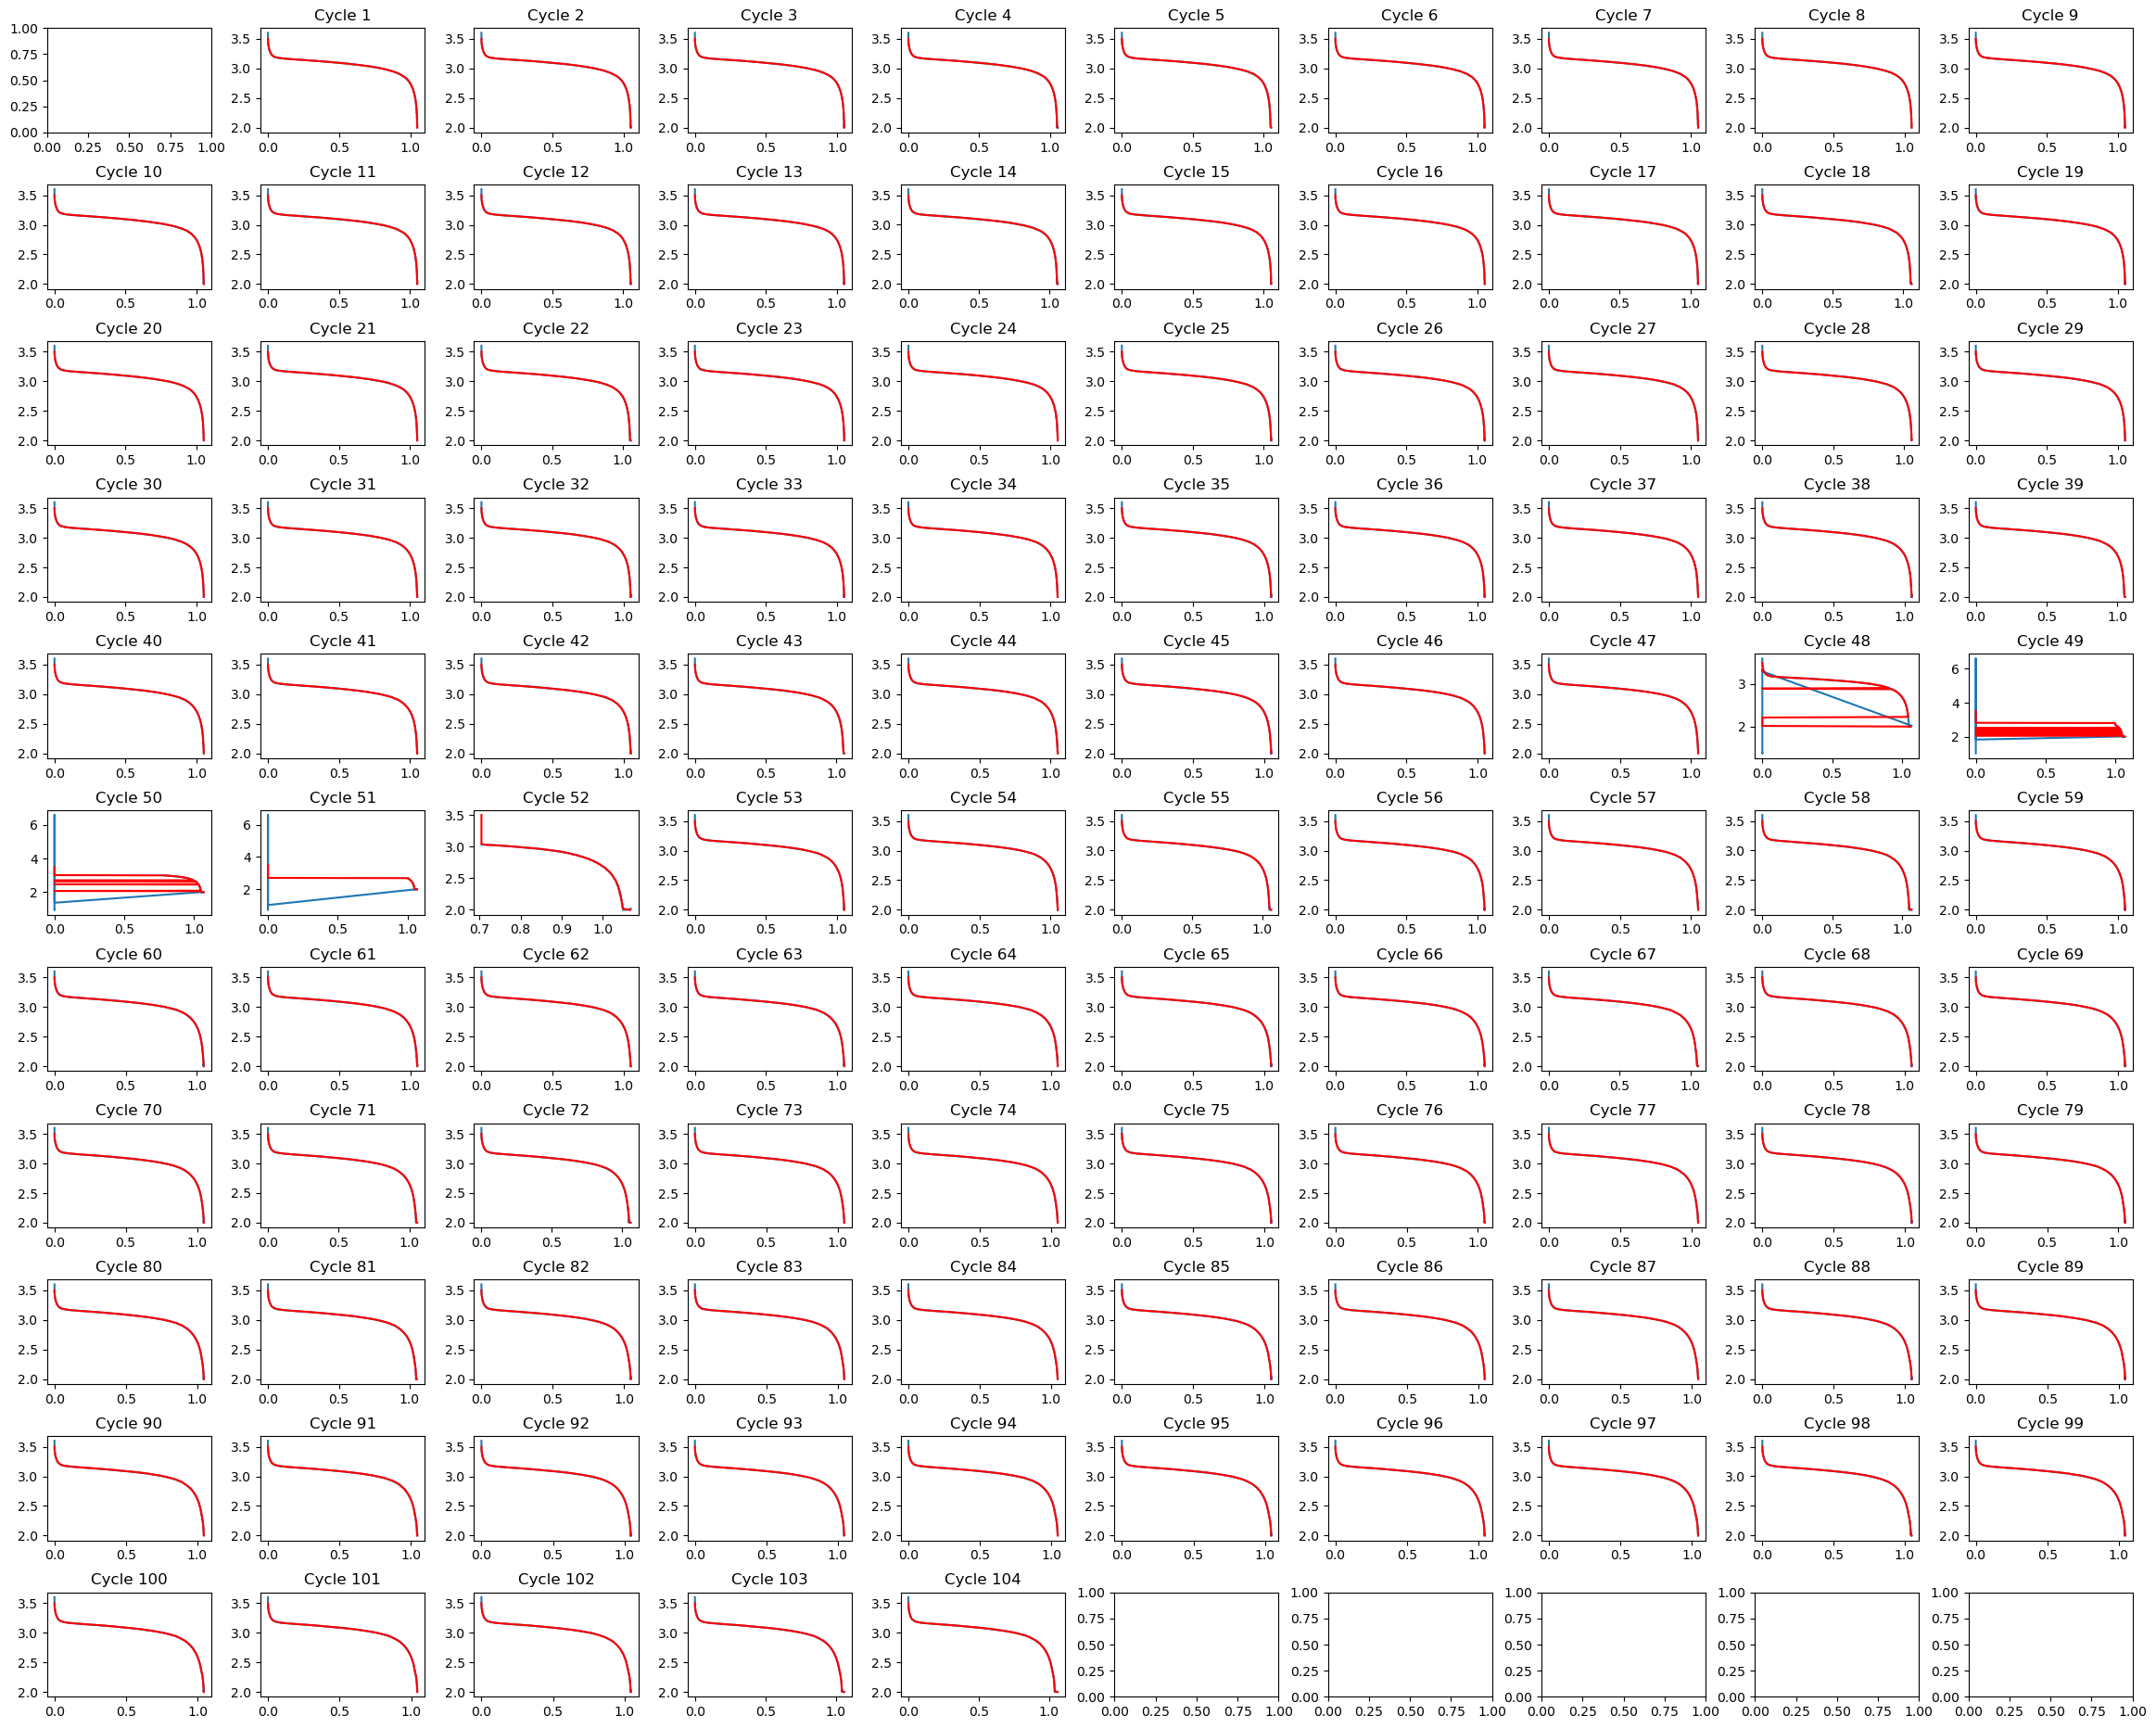

In [340]:
from scipy.signal import argrelextrema
summ_temp = [] #temporary list for summary arrays
fig,ax = plt.subplots(11,10,figsize=(25,20)) 
plt.subplots_adjust(left=0.05, right=0.95, bottom=0.05, top=0.95, wspace=0.3, hspace=0.5)

i = 18
# for i in [11]:

cycle_life = file[cycle_life_file[i,0]][0]


discharge_data = file[batch_summary_file[i,0]]['QDischarge'][0,:].tolist()

cycleNum_data = file[batch_summary_file[i,0]]['cycle'][0,:].tolist()



summary_discharge = np.hstack(discharge_data)

summary_cycleNum = np.hstack(cycleNum_data)



ds = xr.Dataset({'Discharge': ('cycleNum', summary_discharge)},
            coords={'cycleNum': summary_cycleNum,})
ds.expand_dims(dim={'cell_id': i})
summ_temp.append(ds)

print('Done with cell ' + str(i))

################ DATA PER CYCLE FOR EACH CELL INTO A FORMATTED FILE FOR ML #############
cycles = file[cycles_file[i,0]]

num_of_cycles = 101+4 # only for batch1
cycle_temp = [] #temporary list for cycle arrays
j = 0
for row in range(11):
    for col in range(10):
        # for j in range(num_of_cycles):
        #
        if j == 0:
        # if file_idx == 0: # no data for first cycle in file 1
            print('nothing')
            
        else:
            # print('cycle %.f, cell %.f'%(j, i))
            voltage = np.array((file[cycles['V'][j,0]])).squeeze()
            discharge_cap = np.array((file[cycles['Qd'][j,0]])).squeeze()
        
            ################### remove the datapoints where the battery is charging ###################
            ################### so when it reached the max volt = 3.6, it will start discharging ###################
            ################### so I used the max 3.6 as the cut-off point for all data, and keep the rest after that max data point ###################

            disWindow = np.logical_and(discharge_cap <= 0.2*np.max(discharge_cap), discharge_cap >= 0) # to extract the location of max voltage = 3.6 V
            voltage_temp = voltage[disWindow]#cut_off_idx_min]
            discharge_cap_temp = discharge_cap[disWindow]#cut_off_idx_min]
            # print(disWindow)
            # plt.plot(discharge_cap_temp,voltage_temp,'-')

            cut_off_idx = np.argmax(voltage_temp) # to get the 3.6 V
            voltage = voltage[cut_off_idx:]#cut_off_idx_min] # to get the data after 3.6 V
            discharge_cap = discharge_cap[cut_off_idx:]#cut_off_idx_min]
            # plt.plot(discharge_cap,voltage,'r-o')
        
            cut_off_idx = np.argmin(voltage) # to get the minimum 2.0 V
            voltage = voltage[0:cut_off_idx]#cut_off_idx_min] # to get the data before 2.0 V and keep data after 3.6V
            discharge_cap = discharge_cap[0:cut_off_idx]

            # plt.plot(discharge_cap,voltage,'-',label = 'after cropping')#,markersize = 2)
            ax[row,col].plot(discharge_cap,voltage,'-',label = 'after cropping')#,markersize = 2)
            ax[row,col].set_title('Cycle %.f'%(j))
            # plt.legend()
            # if j == 11:
            #     plt.figure(2)
            #     plt.plot(discharge_cap,voltage,'m-')
            #     loop =  True; idx = 0
            #     disWindow = np.logical_and(discharge_cap <= 1.1, discharge_cap >= 0.8) # to extract the location of max voltage = 3.6 V
            #     voltage_temp = voltage[disWindow]#cut_off_idx_min]
            #     discharge_cap_temp = discharge_cap[disWindow]#cut_off_idx_min]
            #     plt.figure(3)
            #     plt.plot(discharge_cap_temp,voltage_temp,'k-')
            #     while loop == True:
            #         diff = voltage_temp[idx + 1] - voltage_temp[idx] # to remove the spikes at the end
                    
            #         if diff > 0: # where the spikes begin
            #             idx_keep = idx + (len(voltage) - len(voltage_temp)) 
            #             loop = False
            #         idx = idx + 1
            #     voltage = voltage[0:idx_keep]#cut_off_idx_min] # to get the data before 2.0 V and keep data after 3.6V
            #     discharge_cap = discharge_cap[0:idx_keep]
            #     plt.figure(2)
            #     plt.plot(discharge_cap,voltage,'k-')

            # if j == 12:
            #     plt.figure(2)
            #     plt.plot(discharge_cap,voltage,'bo-')
            #     # plt.xlim([0,0.2])
            #     disWindow = np.logical_and(discharge_cap <= 0.075, discharge_cap >= 0.05) # to extract the location of max voltage = 3.6 V
            #     voltage_temp = voltage[disWindow]#cut_off_idx_min]
            #     discharge_cap_temp = discharge_cap[disWindow]#cut_off_idx_min]
            #     idx_keep = argrelextrema(voltage_temp, np.greater)
            #     idx_now = np.where(voltage == voltage_temp[idx_keep[0]])
            #     # idx_keep = idx_keep[0] + 
            #     print(idx_now[0])
            #     voltage.tolist().remove(voltage[idx_now[0]]); discharge_cap.tolist().remove(discharge_cap[idx_now[0]])

            #     # voltage_temp = voltage[0:idx_keep]; discharge_cap_temp = discharge_cap[0:idx_keep]
            #     # voltage_temp1 = voltage[idx_keep:]; discharge_cap_temp1 = discharge_cap[idx_keep:]
            #     # voltage = np.append(voltage_temp,voltage_temp1)
            #     # discharge_cap = np.append(discharge_cap_temp,discharge_cap_temp1)
            #     # # discharge_cap.remove(idx_keep)
            #     # # loop =  True; idx = 0
            #     # # disWindow = np.logical_and(discharge_cap <= 1.1, discharge_cap >= 0.8)
            #     # plt.figure(2)
            #     plt.plot(discharge_cap,voltage,'k-')
            #     plt.plot(discharge_cap[idx_now[0]],voltage[idx_now[0]],'mo')

            # if j == 12:
            #     continue
            ################### linear interpolation of the curve, so that I can have 100 data points for all cycles ###################
            func_interp = interp1d(voltage,discharge_cap,kind = 'nearest',fill_value = "extrapolate") # default is linear, and interpolate, nearest is rounding down, nearest-up is rounding up
            # min and max voltage not necessarily at 2 and 3.5, so add extrapolate so no error message for the next lines
            volt_interp = np.linspace(2.0,3.5,100) # x-data
            # volt_interp = np.linspace(np.min(voltage),np.max(voltage),100) # x-data
            # print(np.min(voltage),np.max(voltage))

            discharge_cap_interp = func_interp(volt_interp) # y-data
            
            # plt.plot(discharge_cap_interp,volt_interp,'o-',label = 'interpolation',markersize = 3)#,label='volt'); plt.axhline(y = 3.5)       
            # plt.plot(discharge_cap,voltage)#,'k-')
            # plt.legend()
            # if j == 11:
            ax[row,col].plot(discharge_cap_interp,volt_interp,'r-',label = 'interpolation',markersize = 3)
            # ax[row,col].set_title('Cell %.f'%(i))
            
            ds2 = xr.Dataset({'Qd': ('voltage', discharge_cap_interp)},
                            coords={'voltage': volt_interp,})      
            ds2.expand_dims(dim={'cycle_id': j})
            # ds2.expand_dims(dim={'cycle_id': j - 1}) # only for batch 1, to fix the no cycle 1 data issue

            cycle_temp.append(ds2)
        j = j + 1
        if j >= num_of_cycles:
            break


### Lines of code below is for specil filtering of data for certain cells/cycles (END)